In [447]:
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, r2_score

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

import os

In [448]:
train = pd.read_csv('dataset/train.csv')
test= pd.read_csv('dataset/test.csv')
wind = 'windmill_generated_power(kW/h)'
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [449]:
train.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
dtype: object

# Deal with NaN Values:

In [450]:
train.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

In [451]:
train = train[~train[wind].isnull()]
train.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    271
atmospheric_temperature(°C)       3422
shaft_temperature(°C)                2
blades_angle(°)                    212
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2690
area_temperature(°C)                 0
windmill_body_temperature(°C)     2352
wind_direction(°)                 5058
resistance(ohm)                      1
rotor_torque(N-m)                  567
turbine_status                    1747
cloud_level                        272
blade_length(m)                   5057
blade_breadth(m)                     0
windmill_height(m)                 538
windmill_generated_power(kW/h)       0
dtype: int64

### Categorical Features

In [452]:
# Function to impute most occured category and add importance vairable
def impute_categorical(DataFrame,ColName):
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    DataFrame[ColName].fillna(Mode_Category,inplace=True)

In [453]:
for c in ['turbine_status','cloud_level']:
    impute_categorical(train, c)
    
# train[['turbine_status','turbine_status_Imputed','cloud_level','cloud_level_Imputed']].head(10)

### Numerical

In [454]:
train.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)', 'turbine_status_Imputed',
       'cloud_level_Imputed'],
      dtype='object')

In [455]:
import datawig

def impute_any(output_column):
    df_train, df_test = datawig.utils.random_split(train)

    #Initialize a SimpleImputer model
    imputer = datawig.SimpleImputer(
        input_columns=['tracking_id', 'datetime', 'wind_speed(m/s)', 'shaft_temperature(°C)', 'blades_angle(°)',\
                       'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',\
                       'area_temperature(°C)', 'resistance(ohm)', 'rotor_torque(N-m)', 'turbine_status', 'cloud_level',\
                       'blade_length(m)', 'windmill_height(m)'], # column(s) containing information about the column we want to impute
        output_column= output_column, # the column we'd like to impute values for
        output_path = 'imputer_model' # stores model data and metrics
        )

    #Fit an imputer model on the train data
    imputer.fit(train_df=df_train, num_epochs=50)

    #Impute missing values and return original dataframe with predictions
    imputed = imputer.predict(df_test)
    return imputed
# w = impute_any('wind_speed(m/s)')

In [456]:
for i in train.columns:
    if train[i].isnull().sum()>0:
        mean = train[i].mean()
        train[i].replace(np.nan, mean, inplace=True)

In [457]:
wind = 'windmill_generated_power(kW/h)'
train.shape

(27993, 24)

In [458]:
train.isnull().sum()

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
turbine_status_Imputed            0
cloud_level_Imputed               0
dtype: int64

In [459]:
train

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,20.767246,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521,0,0
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,20.767246,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275,0,0
2,WM_39146,2019-09-14 14:03:20,95.484724,0.371184,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342,0,0
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,Low,4.857385,0.367140,24.287767,14.851089,0,1
4,WM_21521,2019-05-04 03:13:20,10.722890,0.371184,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,2.248762,0.453374,27.971650,3.519074,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934,0,0
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195,0,0
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,D,Medium,2.248762,0.380264,28.533850,11.096599,0,0
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239,0,0


## Numerical Values

<AxesSubplot:>

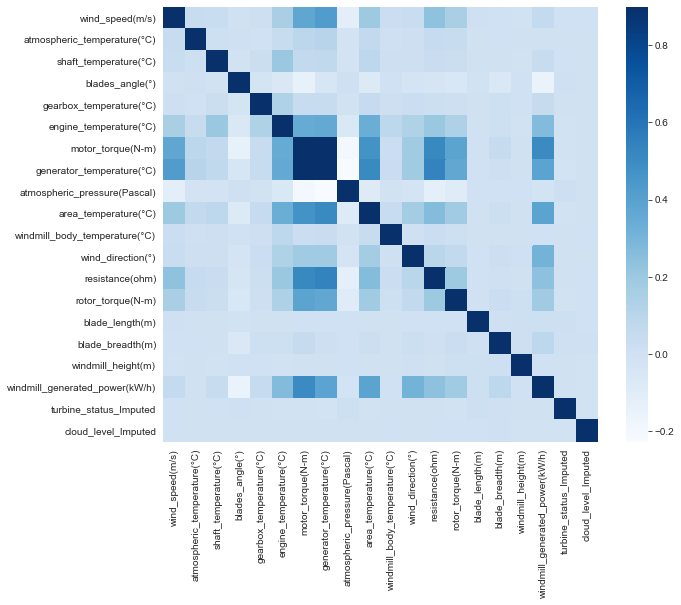

In [460]:
corr = train.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

## Distribution

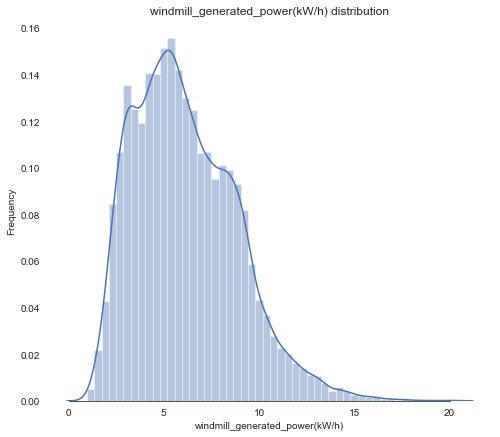

In [461]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train[wind], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=wind)
ax.set(title=f"{wind} distribution")
sns.despine(trim=True, left=True)
plt.show()


 mu = 1.89 and sigma = 0.39



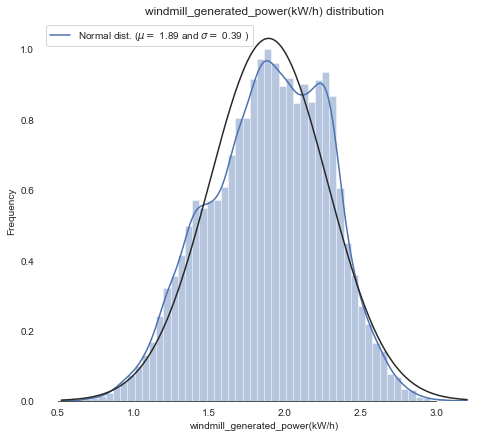

In [462]:
# log(1+x) transform
train[wind] = np.log1p(train[wind])

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(train[wind] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train[wind])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel=wind)
ax.set(title=f"{wind} distribution")
sns.despine(trim=True, left=True)

plt.show()

In [463]:
train[wind]

0        2.049822
1        1.941081
2        1.354376
3        2.763238
4        1.508307
           ...   
28195    2.359715
28196    1.708775
28197    2.492924
28198    2.339229
28199    1.350756
Name: windmill_generated_power(kW/h), Length: 27993, dtype: float64

## Outliers

In [464]:
def cap_data(df):
    for col in df.columns:
        if (df[col].dtype in ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']) and (col != wind):
            print("capping the ",col)
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

train = cap_data(train)
train

capping the  wind_speed(m/s)
capping the  atmospheric_temperature(°C)
capping the  shaft_temperature(°C)
capping the  blades_angle(°)
capping the  gearbox_temperature(°C)
capping the  engine_temperature(°C)
capping the  motor_torque(N-m)
capping the  generator_temperature(°C)
capping the  atmospheric_pressure(Pascal)
capping the  area_temperature(°C)
capping the  windmill_body_temperature(°C)
capping the  wind_direction(°)
capping the  resistance(ohm)
capping the  rotor_torque(N-m)
capping the  blade_length(m)
capping the  blade_breadth(m)
capping the  windmill_height(m)
capping the  turbine_status_Imputed
capping the  cloud_level_Imputed


,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),turbine_status_Imputed,cloud_level_Imputed
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,20.767246,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,2.049822,0,0
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,20.767246,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,1.941081,0,0
2,WM_39146,2019-09-14 14:03:20,95.484724,0.371184,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,1.354376,0,0
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,Low,4.857385,0.367140,24.287767,2.763238,0,0
4,WM_21521,2019-05-04 03:13:20,10.722890,0.371184,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,2.248762,0.453374,27.971650,1.508307,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,2.359715,0,0
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,1.708775,0,0
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,19083.881449,45.129442,43.576510,534.209913,1951.728713,88.319152,D,Medium,2.248762,0.380264,28.533850,2.492924,0,0
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,18360.785707,45.603927,44.973415,550.354504,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,2.339229,0,0


In [465]:
from scipy import stats

pearson_p = []
for i in train.columns:
    if train[i].dtypes!='O':
        pearson_coef, p_value = stats.pearsonr(train[i], train[wind])
        pearson_p.append([i, pearson_coef, p_value])
pearson_p_df = pd.DataFrame(pearson_p, columns=['Numerical Features', 'Pearson Coefficient', 'p-Value']) 

In [466]:
pearson_p_final = []
for i in range(20):
    if pearson_p_df.loc[i, 'p-Value'] < 0.001:
        pearson_p_final.append(pearson_p_df.loc[i, 'Numerical Features'])
pearson_p_final

['wind_speed(m/s)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'area_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_length(m)',
 'blade_breadth(m)',
 'windmill_generated_power(kW/h)']

## Categorical Variables:

<AxesSubplot:xlabel='turbine_status', ylabel='windmill_generated_power(kW/h)'>

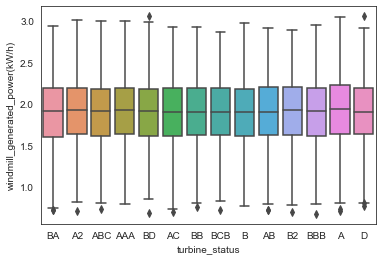

In [467]:
sns.boxplot(train['turbine_status'], train[wind])

<AxesSubplot:xlabel='cloud_level', ylabel='windmill_generated_power(kW/h)'>

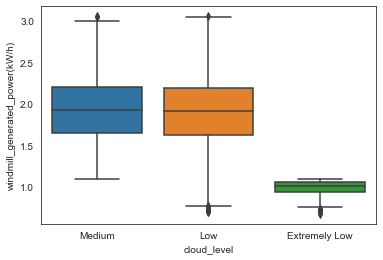

In [468]:
sns.boxplot(train['cloud_level'], train[wind])

In [469]:
cat_group = train[['turbine_status', 'cloud_level', wind]]
cat_group

,turbine_status,cloud_level,windmill_generated_power(kW/h)
0,BA,Medium,2.049822
1,A2,Medium,1.941081
2,ABC,Medium,1.354376
3,ABC,Low,2.763238
4,AAA,Medium,1.508307
...,...,...,...
28195,BB,Medium,2.359715
28196,BB,Low,1.708775
28197,D,Medium,2.492924
28198,BCB,Low,2.339229


In [470]:
cat_group = cat_group.groupby(['cloud_level', 'turbine_status'], as_index=False).mean()
cat_group

,cloud_level,turbine_status,windmill_generated_power(kW/h)
0,Extremely Low,A,0.992350
1,Extremely Low,A2,1.009680
2,Extremely Low,AAA,1.002074
3,Extremely Low,AB,1.003362
4,Extremely Low,ABC,0.966102
5,Extremely Low,AC,0.976070
6,Extremely Low,B,0.980559
7,Extremely Low,B2,0.976248
8,Extremely Low,BA,0.963369
9,Extremely Low,BB,1.001177


In [471]:
grouped_pivot = cat_group.pivot(index='cloud_level',columns='turbine_status')
grouped_pivot

windmill_generated_power(kW/h)                                \
turbine_status                              A        A2       AAA        AB   
cloud_level                                                                   
Extremely Low                        0.992350  1.009680  1.002074  1.003362   
Low                                  1.905328  1.912501  1.900811  1.888194   
Medium                               1.936085  1.910932  1.919573  1.898995   

                                                                            \
turbine_status       ABC        AC         B        B2        BA        BB   
cloud_level                                                                  
Extremely Low   0.966102  0.976070  0.980559  0.976248  0.963369  1.001177   
Low             1.898841  1.892513  1.876082  1.902130  1.900457  1.882233   
Medium          1.895122  1.910502  1.899915  1.916914  1.888049  1.918641   

                                                        
turbine_status       BBB       BCB        BD         D  
cloud_level                                             
Extremely Low   0.995308  0.965727  1.008405  0.974762  
Low             1.886495  1.895079  1.889523  1.878652  
Medium          1.913976  1.902717  1.905572  1.922648

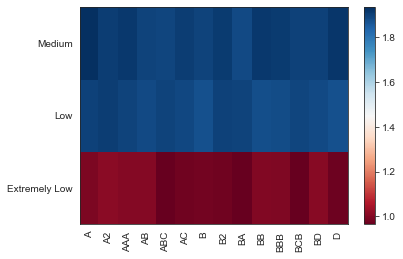

In [472]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### ANOVA

In [473]:
cat_group2=cat_group[['turbine_status', wind]].groupby(['turbine_status'])
cat_group2.head(1)

,turbine_status,windmill_generated_power(kW/h)
0,A,0.992350
1,A2,1.009680
2,AAA,1.002074
3,AB,1.003362
4,ABC,0.966102
5,AC,0.976070
6,B,0.980559
7,B2,0.976248
8,BA,0.963369
9,BB,1.001177


In [474]:
# turbine_status
f_val, p_val = stats.f_oneway(cat_group2.get_group('A')[wind], cat_group2.get_group('A2')[wind],\
                              cat_group2.get_group('AAA')[wind], cat_group2.get_group('AB')[wind],\
                              cat_group2.get_group('ABC')[wind], cat_group2.get_group('AC')[wind],\
                              cat_group2.get_group('B')[wind], cat_group2.get_group('B2')[wind],\
                              cat_group2.get_group('B2')[wind], cat_group2.get_group('BA')[wind],\
                              cat_group2.get_group('BB')[wind], cat_group2.get_group('BBB')[wind],\
                              cat_group2.get_group('BCB')[wind], cat_group2.get_group('BD')[wind],\
                              cat_group2.get_group('D')[wind])  
 
print( "ANOVA for turbine_status: F=", f_val, ", P =", p_val)

ANOVA for turbine_status: F= 0.0008267293251971944 , P = 0.9999999999999999


In [475]:
cat_group3=cat_group[['cloud_level', wind]].groupby(['cloud_level'])
cat_group3.head(1)

,cloud_level,windmill_generated_power(kW/h)
0,Extremely Low,0.992350
14,Low,1.905328
28,Medium,1.936085


In [476]:
# cloud_level
f_val, p_val = stats.f_oneway(cat_group3.get_group('Extremely Low')[wind], cat_group3.get_group('Low')[wind],\
                              cat_group3.get_group('Medium')[wind])  
 
print( "ANOVA for cloud_level: F=", f_val, ", P =", p_val)

ANOVA for cloud_level: F= 21275.068303506185 , P = 5.681101353417971e-60


### So important variables we derived:
#### Numerical:
- wind_speed(m/s)
- haft_temperature(°C)
- blades_angle(°)
- gearbox_temperature(°C)
- engine_temperature(°C)
- motor_torque(N-m)
- generator_temperature(°C)
- area_temperature(°C)
- wind_direction(°)
- resistance(ohm)
- rotor_torque(N-m)
- blade_breadth(m)

#### Categorical
- cloud_level

In [477]:
from sklearn.model_selection import train_test_split
X = train.drop([wind, 'tracking_id', 'datetime'], axis=1)
y = train[wind]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((19595, 21), (8398, 21))

# Encoding

In [478]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['turbine_status', 'cloud_level'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status_1,turbine_status_2,turbine_status_3,turbine_status_4,turbine_status_5,turbine_status_6,turbine_status_7,turbine_status_8,turbine_status_9,turbine_status_10,turbine_status_11,turbine_status_12,turbine_status_13,turbine_status_14,cloud_level_1,cloud_level_2,cloud_level_3,blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_Imputed,cloud_level_Imputed
10587,91.631751,17.475524,-6.053756,-99.000000,43.570172,40.871759,2048.311825,72.328688,16573.218014,26.413834,40.794926,295.869280,1697.448009,33.479618,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.514712,0.310774,26.070573,0,0
8629,93.674332,20.441598,40.693269,-99.000000,41.778787,43.065791,1087.941429,68.316584,-491540.042702,33.510627,43.041766,524.463347,1662.656181,20.827383,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3.448837,0.378873,24.968575,0,0
7065,15.080719,-99.000000,15.197415,-0.307106,16.024006,12.027749,767.486426,38.880344,119242.329458,24.176327,20.767246,280.109871,1217.345249,12.020366,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.353452,0.433982,27.566085,0,0
6301,19.000450,14.396865,44.572377,-0.909147,54.833319,45.716676,793.695909,39.753432,121516.053960,27.908487,-99.000000,306.721006,-99.000000,13.954682,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.013308,0.405832,26.885656,0,0
21145,-169.530784,10.830689,44.640474,-1.114691,42.587215,44.824588,839.215178,39.846920,116264.280714,26.100918,-99.000000,226.837541,1278.058555,14.944096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,4.803434,0.388273,25.711428,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13210,-107.206822,14.190797,80.688395,-0.692205,137.459567,43.921804,929.826193,42.362351,118426.832893,32.415978,20.767246,232.455409,1420.695555,16.786307,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3.385628,0.407371,26.490003,1,0
19784,94.146353,17.551073,45.146921,9.648162,48.821965,45.241926,2802.511942,92.887576,18847.194888,39.858219,43.560988,499.761898,1975.706079,47.059900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2.357959,0.335699,27.043789,0,0
9910,41.308615,11.860592,45.693220,11.938051,49.468022,42.891585,934.817779,47.127975,141413.343409,36.924496,45.172467,516.914848,1465.555896,18.252104,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2.348490,0.445592,25.164745,1,0
10869,95.722664,26.078089,41.864851,38.798129,39.429732,42.490011,1141.501484,66.925160,16402.040513,33.423691,45.294931,106.899949,1663.606364,-53.173383,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3.816595,0.383892,25.358264,0,0


In [479]:
X_train.shape, X_test.shape

((19595, 36), (8398, 36))

# Feature Scaling

In [480]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [481]:
X_train

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status_1,turbine_status_2,turbine_status_3,turbine_status_4,turbine_status_5,turbine_status_6,turbine_status_7,turbine_status_8,turbine_status_9,turbine_status_10,turbine_status_11,turbine_status_12,turbine_status_13,turbine_status_14,cloud_level_1,cloud_level_2,cloud_level_3,blade_length(m),blade_breadth(m),windmill_height(m),turbine_status_Imputed,cloud_level_Imputed
0,-0.021843,0.147263,-12.320445,-15.168476,0.061803,-0.813227,0.010607,0.042860,-0.022065,-0.559358,-0.072121,0.069263,0.033726,0.070159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.328199,-0.864337,0.055899,0.0,0.0
1,0.005813,0.280693,-0.740335,-15.168476,-0.278838,-0.140720,-0.593762,-0.063745,-5.122871,0.089090,0.023209,2.770885,-0.028526,-0.390162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211501,-0.197183,-0.314985,0.0,0.0
2,-1.058311,-5.092418,-7.056134,0.032316,-5.176249,-9.654386,-0.795427,-0.845888,1.008601,-0.763803,-0.921868,-0.116989,-0.825318,-0.710585,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.161447,0.342723,0.559221,0.0,0.0
3,-1.005239,0.008769,0.220592,-0.060411,2.203552,0.671820,-0.778933,-0.822690,1.031426,-0.422788,-6.003429,0.197513,-3.180643,-0.640209,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.507711,0.066939,0.330219,0.0,0.0
4,-3.557870,-0.151656,0.237461,-0.092069,-0.125111,0.398380,-0.750288,-0.820206,0.978705,-0.587949,-6.003429,-0.746584,-0.716684,-0.604212,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.922334,-0.105085,-0.064974,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19590,-2.714031,-0.000501,9.167203,-0.026997,17.915379,0.121662,-0.693265,-0.753369,1.000414,-0.010931,-0.921868,-0.680189,-0.461464,-0.537187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.178332,0.082011,0.197060,1.0,0.0
19591,0.012203,0.150662,0.362917,1.565638,1.060460,0.526301,0.485231,0.589125,0.000762,0.669081,0.045239,2.478953,0.531611,0.564246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,-0.360943,-0.620149,0.383440,0.0,0.0
19592,-0.703196,-0.105326,0.498246,1.918329,1.183311,-0.194117,-0.690124,-0.626742,1.231169,0.401021,0.113612,2.681673,-0.381196,-0.483858,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-0.365912,0.456465,-0.248962,1.0,0.0
19593,0.033546,0.534252,-0.450113,6.055349,-0.725524,-0.317206,-0.560056,-0.100716,-0.023784,0.081146,0.118808,-2.164057,-0.026826,-3.082506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.404484,-0.148005,-0.183833,0.0,0.0


# Regressor

In [482]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf2 = RandomForestRegressor(n_estimators=100, random_state=0)

In [483]:
# fit the model
rf.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf.predict(X_test)

In [484]:
from sklearn.metrics import accuracy_score, r2_score

# rf.score(X_test, y_test)
score = max(0, 100 * r2_score(y_test, y_pred))
score

96.70885809439775

# Test with test.csv

In [ ]:
test

In [ ]:
test.isnull().sum()

In [ ]:
for c in ['turbine_status','cloud_level']:
    impute_categorical(test, c)

In [ ]:
for i in test.columns:
    if test[i].isnull().sum()>0:
        mean = test[i].mean()
        test[i].replace(np.nan, mean, inplace=True)
test

In [ ]:
X_train_final = train.drop([wind, 'tracking_id', 'datetime'], axis=1)
y_train_final = train[wind]
X_test_final = test.drop(['tracking_id', 'datetime'], axis=1)


X_train_final.shape, X_test_final.shape

In [ ]:
X_test_final

In [ ]:
X_train_final = encoder.fit_transform(X_train_final)
X_test_final = encoder.transform(X_test_final)
X_train_final

In [ ]:
X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

X_train_final= pd.DataFrame(X_train_final, columns=[cols])
X_test_final = pd.DataFrame(X_test_final, columns=[cols])

In [ ]:
rf2.fit(X_train_final, y_train_final)

# Predict the Test set results
y_pred_final = np.expm1(rf2.predict(X_test_final))
y_pred_final

In [ ]:
y_pred_final_df = pd.DataFrame(y_pred_final, columns=[wind])
y_pred_final_df

In [ ]:
submission = pd.concat([test[['tracking_id', 'datetime']], y_pred_final_df], axis=1)
submission.isnull().sum()

In [ ]:
submission.shape

In [ ]:
submission.to_csv('submissions/submission15(normaldist).csv', index=False)

# Feature Importance

In [ ]:
feature_scores = pd.Series(rf2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

In [ ]:
# f, ax = plt.subplots(figsize=(30, 24))
# ax = sns.barplot(x=feature_scores, y=X_train.columns, data=train)
# ax.set_title("Visualize feature scores of the features")
# ax.set_yticklabels(feature_scores.index)
# ax.set_xlabel("Feature importance score")
# ax.set_ylabel("Features")
# plt.show()

### More tests

In [485]:
imp0 = ['wind_speed(m/s)',
 'shaft_temperature(°C)',
 'blades_angle(°)',
 'gearbox_temperature(°C)',
 'engine_temperature(°C)',
 'motor_torque(N-m)',
 'generator_temperature(°C)',
 'area_temperature(°C)',
 'wind_direction(°)',
 'resistance(ohm)',
 'rotor_torque(N-m)',
 'blade_breadth(m)', 'cloud_level']

imp = ['motor_torque(N-m)', 'blades_angle(°)', 'atmospheric_pressure(Pascal)', 'resistance(ohm)', 'generator_temperature(°C)', 'engine_temperature(°C)']

In [488]:
from sklearn.model_selection import train_test_split
X = train[imp0]
y = train[wind]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

# Encoding

import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cloud_level'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
# X_train

# X_train.shape, X_test.shape

# Feature Scaling

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train

# Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf2 = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model
rf2.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf2.predict(X_test)

from sklearn.metrics import accuracy_score, r2_score

# rf.score(X_test, y_test)
score = max(0, 100 * r2_score(y_test, y_pred))
score

AttributeError: 'numpy.ndarray' object has no attribute 'quantile'

In [487]:
X_train_final = train[imp0]
y_train_final = train[wind]
X_test_final = test[imp0]


X_train_final.shape, X_test_final.shape

X_test_final

X_train_final = encoder.fit_transform(X_train_final)
X_test_final = encoder.transform(X_test_final)
X_train_final

X_train_final = scaler.fit_transform(X_train_final)
X_test_final = scaler.transform(X_test_final)

X_train_final= pd.DataFrame(X_train_final, columns=[cols])
X_test_final = pd.DataFrame(X_test_final, columns=[cols])

rf2.fit(X_train_final, y_train_final)

# Predict the Test set results
y_pred_final = np.expm1(rf2.predict(X_test_final))
y_pred_final

y_pred_final_df = pd.DataFrame(y_pred_final, columns=[wind])
y_pred_final_df

submission = pd.concat([test[['tracking_id', 'datetime']], y_pred_final_df], axis=1)
submission.isnull().sum()

# Fix outleir predictions
q1 = submission[wind].quantile(0.0045)
q2 = submission[wind].quantile(0.99)
submission[wind] = submission[wind].apply(lambda x: x if x > q1 else x*0.77)
submission[wind] = submission[wind].apply(lambda x: x if x < q2 else x*1.1)
submission[wind] *= 1.001619

submission.shape

submission.to_csv('submissions/submission16(normaldist_imp0).csv', index=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').